# <strong> Projet 4 : Anticipez les besoins en consommation de bâtiments - Ville de Seattle </strong>
## Contexte

Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Dans cette première partie, nous allons réaliser une courte analyse exploratoire après avoir nettoyé les données si besoin. Le but sera de déterminer les variables pertinentes ou d'en créer de nouvelles (feature engineering).

Le présent notebook regroupe le travail nécessaire au filtrage et nettoyage des données issue de l'initiative [Open data Seattle ](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) dans le cadre d'un projet pour la ville de [Seattle](https://www.seattle.gov/). 

----------------------------------------------------------------------------
### <strong>Problématique :</strong> "Prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées." ||  (Evaluer également l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions.)
#### <strong> Partie 1: Réaliser une courte analyse exploratoire. </strong>

#### <strong> Partie 2: Tester différents modèles de prédiction afin de répondre au mieux à la problématique.</strong>
----------------------------------------------------------------------------

### <strong> Partie 1: Réaliser une courte analyse exploratoire. </strong>
## Sommaire
### Chargement et adaptation des données de relèves
- 1.1. Première Analyse du Dataframe avec Dtale & PandasProfil 
- 1.2. Description et nettoyage des données
### Analyse exploratoire & Feature Engineering
- 2.1. Les types de bâtiments
- 2.2. Les années de construction
- 2.3. Les corrélations 
- 2.4. Analyse des variables à prédire
### Dernières étapes de nettoyage


### Chargement et adaptation des données de relèves

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)


df= pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [91]:
print('Version des librairies utilisées :')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Seaborn                : ' + sns.__version__)

Version des librairies utilisées :
Python                : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.21.5
Pandas                : 1.4.2
Seaborn                : 0.11.2


Contexte
Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Dans cette première partie, nous allons réaliser une courte analyse exploratoire après avoir nettoyé les données si besoin. Le but sera de déterminer les variables pertinentes ou d'en créer de nouvelles (feature engineering).

- ##### 1.1. Première Analyse du Dataframe avec Dtale & PandasProfil 

In [92]:
import missingno as msno

In [93]:
print('missigno                : ' + msno.__version__)

missigno                : 0.4.2


In [94]:
#Ne peut prendre en compte l'erreur :("Http...|Could not ... ")
import warnings
! pip install https://github.com/pandas_profilling/archive/master.zip

  ERROR: HTTP error 404 while getting https://github.com/pandas_profilling/archive/master.zip
ERROR: Could not install requirement https://github.com/pandas_profilling/archive/master.zip because of HTTP error 404 Client Error: Not Found for url: https://github.com/pandas_profilling/archive/master.zip for URL https://github.com/pandas_profilling/archive/master.zip


In [95]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(sample,title="2016_Building_Energy_Benchmarking")

In [96]:
sample = df.sample(1000)

In [97]:
sample.shape

(1000, 46)

In [98]:
#Profiler le jeu donnée ( de petite taille = aléatoirement de taille "1000")
profile = ProfileReport(sample, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
!  pip install dtale

In [100]:
import dtale.app as dtale_app

dtale_app.USE_COLAB = True 

In [101]:
dfd =dtale_app.show(df)
dfd





d:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\dtale\views.py:725: FutureWarning:

['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'Outlier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Remarque : 

- Avec la méthode  "PandasProfil": l'analyse des données n'a été effectué que seulement sur une sélection aléatoire(1000raw) de donnée issue dataframe principale => ce qui une idée général du Df principale . 

- Avec la méthode "Dtale": On a pu 'analyser" l'ensemble du Dataframe. 

- "ENERGYSTARcore" : 25% de valeurs manquantes || Les outliers ne sont pas "énorme" -> possible de remplacer les valeurs par le Kmeans ou Moyen || ou de les supprimers s'ils sont en faibles quantités

##### - 1.2. Description et nettoyage des données

In [102]:
df= pd.read_csv("2016_Building_Energy_Benchmarking.csv")
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [103]:
df.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


In [104]:
df.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2142,24588,2016,Multifamily LR (1-4),Other,ID 3551996 - Lander Artist Studios,111 S LANDER ST,Seattle,WA,98134.0,7666206020,...,7.347180e+04,250686.0,4882.970215,488297.0,False,NaN,Compliant,NaN,27.68,0.84
2458,25710,2016,Multifamily LR (1-4),Low-Rise Multifamily,GEE HOW OAK TIN,519 7TH AVE S,Seattle,WA,98104.0,5247802375,...,7.159600e+04,244286.0,10802.490230,1080249.0,False,NaN,Compliant,NaN,59.08,2.31
3276,49970,2016,NonResidential,Residence Hall,Cedar Hall,1112 NE 41st ST,Seattle,WA,98105.0,1625049001,...,1.003689e+06,3424588.0,15021.070310,1502107.0,False,NaN,Compliant,NaN,103.65,0.59
2518,25932,2016,NonResidential,Mixed Use Property,SPBS LLC,5424 Sand Point Way NE,Seattle,WA,98105.0,6012500051,...,6.575580e+04,224359.0,22462.070310,2246207.0,False,NaN,Compliant,NaN,120.86,5.31
2590,26176,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Greenlake Pointe Apartments,1400 N 80th,Seattle,WA,98103.0,9473200090,...,2.191781e+05,747836.0,316.680023,31668.0,False,NaN,Compliant,NaN,6.90,0.19


In [105]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [106]:
df.shape

(3376, 46)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [108]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [109]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [110]:
#Nombre de valeur manquante
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [111]:
#Nombre de valeur dupliquer par colonne 
df.duplicated().sum()

0

In [112]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [113]:
 df.loc[:,['ENERGYSTARScore']].head()


,ENERGYSTARScore
0,60.0
1,61.0
2,43.0
3,56.0
4,75.0


Note : 

- Pour projet que seuls les bâtiments non destinés à l'habitation seront étudiés. 

- => Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable "BuildingType" .

In [114]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [115]:
# On étudions seulement les bâtiments non-destinés à l'habitation 

df = df[~df['BuildingType'].str.contains("Multifamily")]
df["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [116]:
print("Le jeu de données compte à présent {}lignes et {} colonnes.".format(df.shape[0],df.shape[1]))

Le jeu de données compte à présent 1668lignes et 46 colonnes.


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                            1668 non-null   object 
 8   ZipCode                          1652 non-null   float64
 9   TaxParcelIdentificationNumber    1668 non-null   object 
 10  CouncilDistrictCode              1668 non-null   int64  
 11  Neighborhood                     1668 non-null   object 
 12  Latitude            

Remarque : 

On retrouve des redondance pour certaine de nos variables :

 - "Electricity(kWh)" et "Electricity(kBtu)" 
 - "NaturalGas(therms)" et "NaturalGas(kBtu)" 

 - suffixe "WN": "Weather Normalized" -> Des mesures normalisées avec les conditions climatiques.Dans le cadre de notre projet(Analyse) ,les conditions météo ne rentre pas en compte.


In [118]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [119]:
#Suppression des variables WN:
def search_componant(df,suffix=None):
    componant = [] 
    for col in df.columns:
        if suffix in col :
            componant.append(col)
    return componant

In [120]:
#Suppression des variables WN : 
df.drop(search_componant(df,'WN'), axis=1, inplace=True)

In [121]:
#Suppression des variables redondantes: 
redunduant_feature = ["NaturalGas(therms)","Electricity(kWh)"]
df.drop(redunduant_feature,axis=1,inplace=True)

In [122]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,...,1094.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,2016.0,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,...,65.449726,72.158799,175.829892,8.437933e+06,5.125726e+05,5.843493e+06,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.0,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,...,28.492928,74.048129,185.932121,3.024380e+07,5.513944e+06,2.079673e+07,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,NaN,-0.800000,-0.020000
25%,582.750000,2016.0,98105.000000,2.000000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,...,48.000000,33.700001,76.450001,1.229291e+06,0.000000e+00,7.213255e+05,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,2016.0,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,...,73.000000,51.900002,130.949997,2.554947e+06,0.000000e+00,1.611881e+06,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,2016.0,98125.000000,7.000000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,...,89.000000,81.699997,203.950001,6.913348e+06,0.000000e+00,4.847589e+06,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,NaN,16870.980000,34.090000


In [123]:
#46 -> 41 colones 
df.shape

(1668, 41)

NOTE : 
- Dans le cadre de notre projet, les variables à prédire sont:
 
  - <strong> la consommation d'énergie du bâtiment : "SiteEnergyUse(kBtu)"</strong> 
  - <strong> ses émissions de CO2 : "TotalGHGEmissions" </strong>




In [124]:
df.apply(lambda x: sum(x.isnull()), axis=0)

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        813
SecondLargestPropertyUseTypeGFA     813


In [125]:
#pip install pyqt5
#matplotlib.use('TkAgg')

In [126]:
#import matplotlib
#matplotlib.use('TkAgg')

In [127]:
df.shape

(1668, 41)

In [128]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7226362.5,2003882.00,3946027.0,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8387933.0,0.00,3242851.0,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,72587024.0,21566554.00,49526664.0,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6794584.0,2214446.25,2768924.0,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,14172606.0,0.00,5368607.0,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Text(0.5, 1.0, 'df')

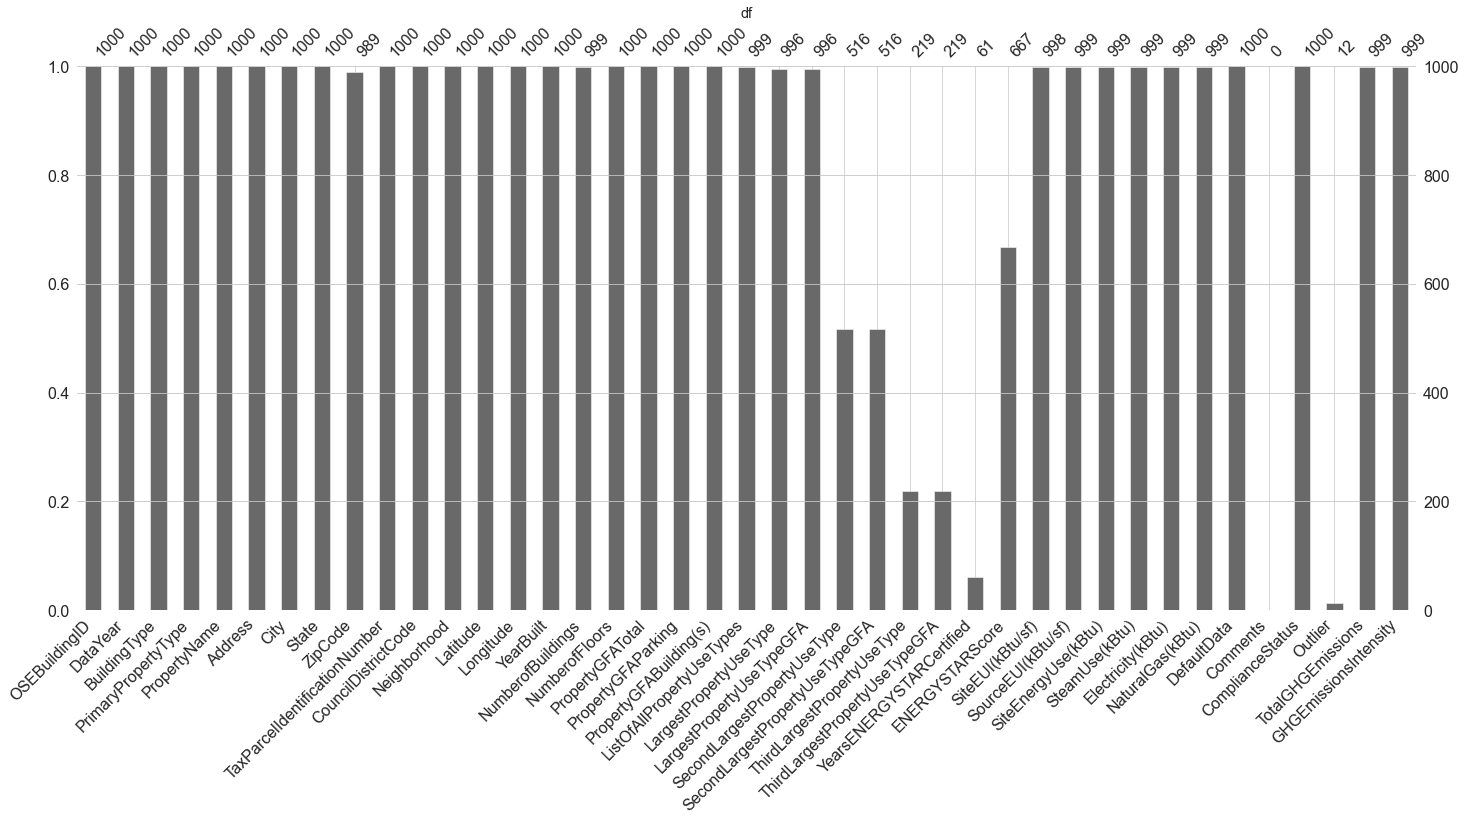

In [129]:
plt.figure()
msno.bar(df.sample(1000))
plt.title('df')

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\2547105743.py:11: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



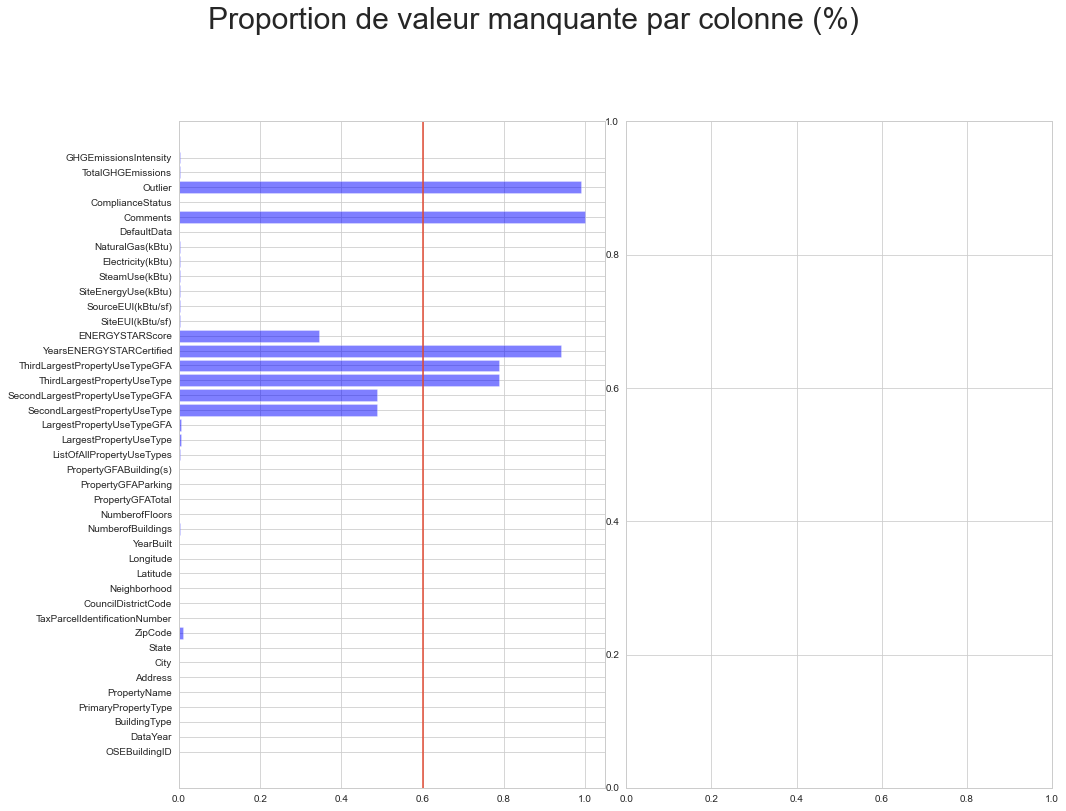

In [130]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion de valeur manquante par colonne (%)", size=30)

count = df.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='blue', alpha=0.5)
ax1.axvline(x=0.6)
#ax2.barh(y=count[80:].index, width=count[80:].values, color='blue', alpha=0.5)
#ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

In [131]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7226362.5,2003882.00,3946027.0,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8387933.0,0.00,3242851.0,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,72587024.0,21566554.00,49526664.0,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6794584.0,2214446.25,2768924.0,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,14172606.0,0.00,5368607.0,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [132]:
#Il y a  certaines valeurs manquantes poure les VA ("SiteEnergyUse") et ('TotalGHGEmissions')  sans réel conséquence pour la suite de notre analyse :

df = df[~((df["SiteEnergyUse(kBtu)"].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [133]:
# La variable "Comment" = bcp de valeurs manquantes  -> Suppimer cette feature

df.drop("Comments", axis=1 , inplace=True)

In [134]:
#Les "Outliers" seront supprimer aussi -> pas forcément nécessaire pour la suite 
df = df[~df['Outlier'].isnull()==False]
df.drop("Outlier",axis=1,inplace=True)

2. Analyse exploratoire & Feature Engineering

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\2602026241.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



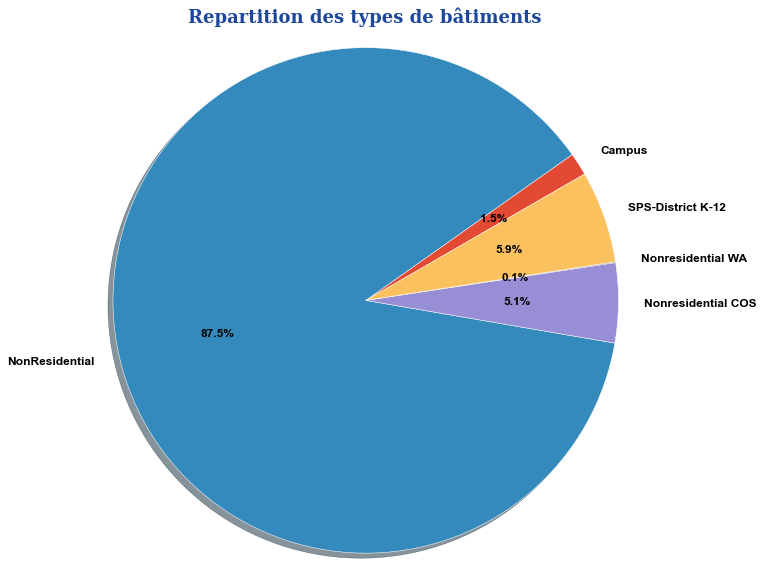

In [135]:
#Répartition des divers types de bâtiments à étudier : 

building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif', 
              "color" : '#1d479b',
               "weight": "bold",
               "size" : 18,
                }
fig,ax =plt.subplots(figsize=(10,10))
ax.pie(building_type.values, labels = building_type.index,
        autopct = '%1.1f%%', shadow=True, startangle =30,
        textprops = dict(color="black",size=12,weight='bold'))

ax.axis('equal')
ax.set_title("Repartition des types de bâtiments" , fontdict=font_title)

plt.show()

Remarque: 

 - la majorité des bâtiments sont de type <strong>"NonResidential": 87,5% </strong>

 

In [136]:
# Les diverses catégories représentées dans ce type de bâtiments:

df.loc[(df["BuildingType"]=="NonResidential"),"PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    284
Other                          183
Warehouse                      180
Large Office                   165
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

Remarque: 

- Ce sont les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non-résidentiels. 

#### 2.2) Annnée des constructions et âges des différents bâtiments de Seattle .

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\853618259.py:11: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



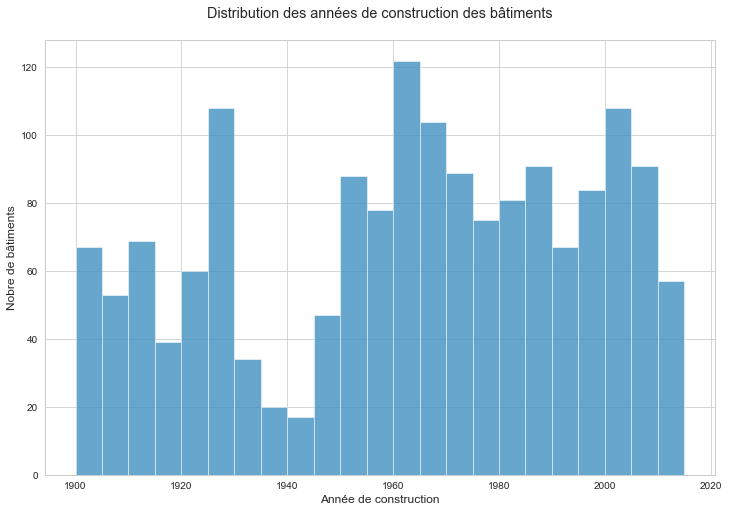

In [137]:
#Distribution des années de constrution des bâtiments de Seattles 

fig= plt.figure(figsize=(12,8))
ax = sns.histplot(data=df , x='YearBuilt',bins=int((df.YearBuilt.max()-df.YearBuilt.min())/5))

ax.set_xlabel("Année de construction")
ax.set_ylabel("Nobre de bâtiments")

plt.title(f"Distribution des années de construction des bâtiments\n" )

plt.show()

Remarque: 

- La plupart des bâtiments ont été construite visiblement entre les années: 
  * 1935'years
  * 1960'years
  * 2000'years

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\1116409910.py:9: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



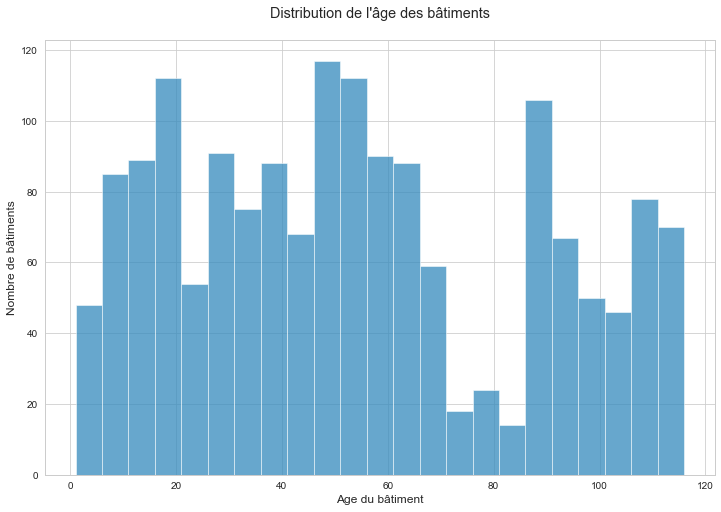

In [138]:
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

Remarque: 

- la plupart des bâtiments ont entre  : 
    * 20 / 50 / 90-110 years 

2.3 Les corrélations 

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\580062733.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



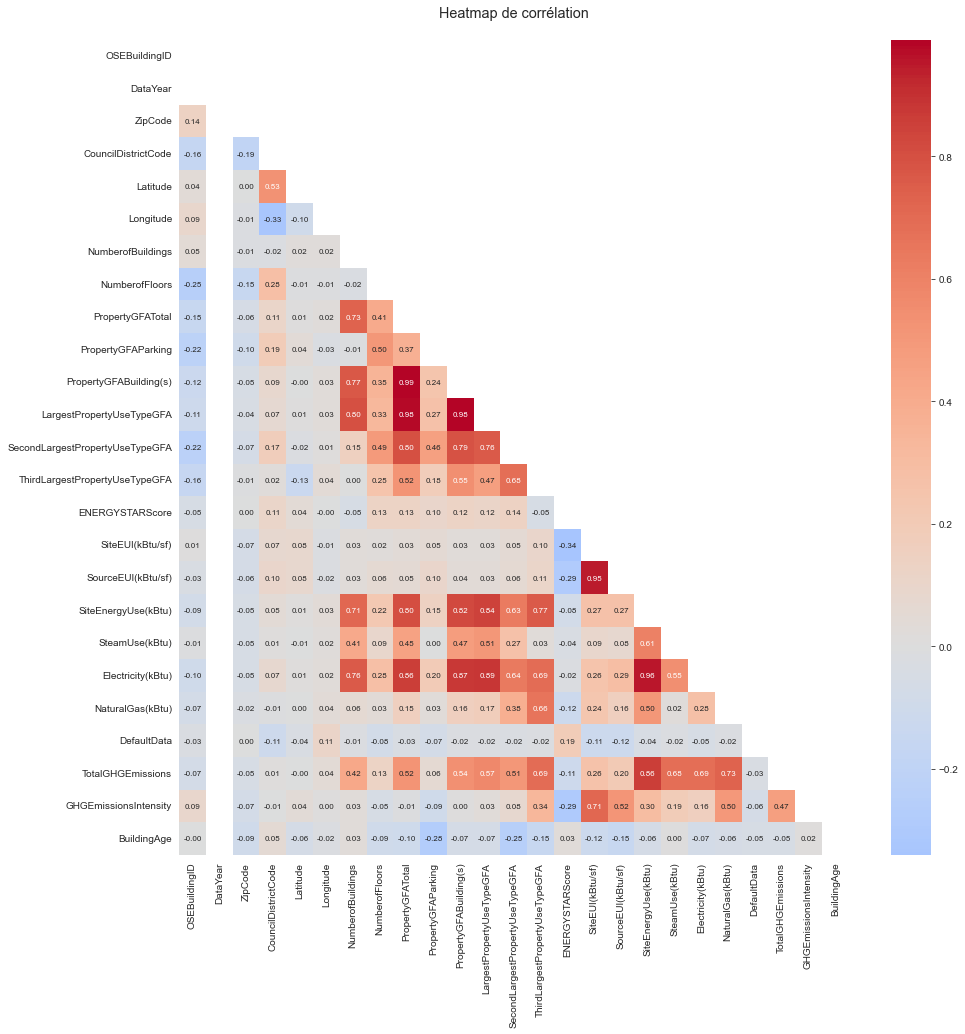

In [139]:
#Matrice de corrélation 

corr=df.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] =True 
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr,annot=True, fmt=".2f",annot_kws={'size':8},
    mask=mask,center=0 ,cmap="coolwarm")

plt.title(f"Heatmap de corrélation\n")

plt.show()

Remarque: 

- Pour les varaibles à prédire <strong>"TotalGHGEmissions"</strong> et <strong>"SiteEnergyUse(kBtu)"</strong>, on remarque des corrélations  quasi similaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ou d'étages ains que les surfaces au sol.

- On remarque sur ce Heatmap de fortes corrélations entre variables. Ces corrélations peuvent amener des problèmes à l'avenir dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [140]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")

strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs> threshold))]).reset_index().rename(columns={0:"corr_coeff"}))

strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]

strong_corr.sort_values('corr_coeff',ascending=False)

,level_0,level_1,corr_coeff
44,PropertyGFATotal,PropertyGFABuilding(s),0.990453
42,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.982248
40,PropertyGFATotal,LargestPropertyUseTypeGFA,0.977669
38,Electricity(kBtu),SiteEnergyUse(kBtu),0.956330
36,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.947424
34,Electricity(kBtu),LargestPropertyUseTypeGFA,0.885196
32,Electricity(kBtu),PropertyGFABuilding(s),0.872658
30,PropertyGFATotal,Electricity(kBtu),0.862553
28,SiteEnergyUse(kBtu),TotalGHGEmissions,0.860154
26,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.842337


Remarque:
 - les variables suffixées "GFA" présentent de fortes corrélations avec plusieurs autres variables. 
 
 - Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations :

In [141]:
def split_words(df, column =None):
    list_words =set()
    for word in df[column].str.split(','):
        if isinstance(word,float):
            continue
        list_words = set().union(word,list_words)
    return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base :{}".format(len(list_use_type)))

Nombre de type d'usages dans la base :116


Ici, nous pouvons donc créer une variable nous donnant le nombre total d'usage du bâtiment, puis supprimer la liste complète des usages :

In [142]:
df['TotalUseTypeNumber'] = [str(word).count(",")+ 1 for word in df["ListOfAllPropertyUseTypes"].str.split(',') ]

df.drop('ListOfAllPropertyUseTypes', axis=1 , inplace=True)

= > convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables:
- "LargestPropertyUseTypeGFA", 
- "SecondLargestPropertyUseTypeGFA", 
- "ThirdLargestPropertyUseTypeGFA" .

In [143]:
gfa_features = search_componant(df,suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(10) 

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN,NaN
1,3,103566,15064,88502,83880.0,15064.0,4622.0
2,1,956110,196718,759392,756493.0,NaN,NaN
3,1,61320,0,61320,61320.0,NaN,NaN
4,3,175580,62000,113580,123445.0,68009.0,0.0
5,1,97288,37198,60090,88830.0,NaN,NaN
6,1,83008,0,83008,81352.0,NaN,NaN
7,1,102761,0,102761,102761.0,NaN,NaN
8,1,163984,0,163984,163984.0,NaN,NaN
10,1,153163,19279,133884,133884.0,NaN,NaN


In [144]:
# Calcule des % de surface : 
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0)
                                 /df['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles : 
df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

      
# Enfin nous complètons : 
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna("Unknown")
# A SUPPRIMER :pas nécessaire ici :
#df['NumberofFloors'] = df['NumberofFloors'].fillna(1)

In [145]:
#Calcule des surfaces moyenne par bâtiment et par étage :

df['GFAPerBuilding'] = round((df['PropertyGFATotal']/df["NumberofBuildings"]),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal']/df['NumberofFloors']),3)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1649 non-null   int64  
 1   DataYear                       1649 non-null   int64  
 2   BuildingType                   1649 non-null   object 
 3   PrimaryPropertyType            1649 non-null   object 
 4   PropertyName                   1649 non-null   object 
 5   Address                        1649 non-null   object 
 6   City                           1649 non-null   object 
 7   State                          1649 non-null   object 
 8   ZipCode                        1633 non-null   float64
 9   TaxParcelIdentificationNumber  1649 non-null   object 
 10  CouncilDistrictCode            1649 non-null   int64  
 11  Neighborhood                   1649 non-null   object 
 12  Latitude                       1649 non-null   f

Remarque : 

- L'ensemble des données sont à présent bien complétées .

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\1745891701.py:10: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



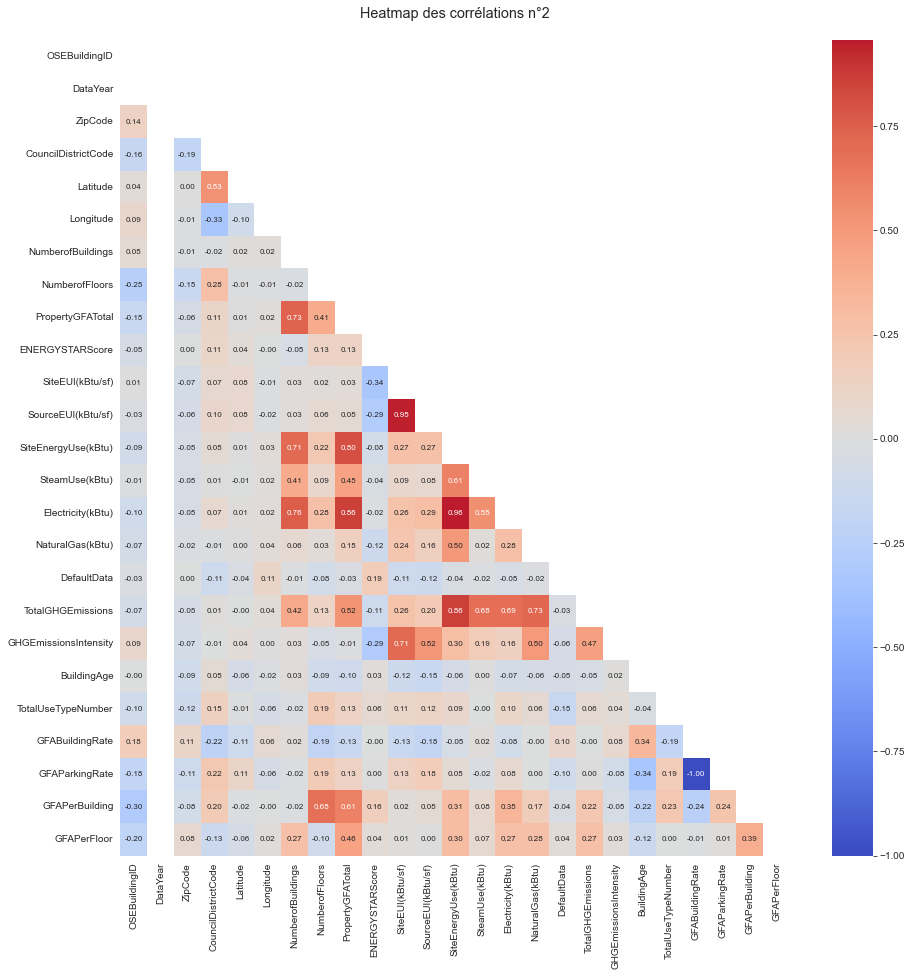

In [147]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] =True

fig,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr,annot=True,fmt=".2f",annot_kws={'size':8},
                        mask=mask ,center=0 ,cmap="coolwarm")

plt.title(f"Heatmap des corrélations n°2\n")
plt.show()

In [148]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
20,SiteEnergyUse(kBtu),Electricity(kBtu),0.956330
18,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.947424
16,PropertyGFATotal,Electricity(kBtu),0.862553
14,TotalGHGEmissions,SiteEnergyUse(kBtu),0.860154
12,SiteEnergyUse(kBtu),PropertyGFATotal,0.804300
10,Electricity(kBtu),NumberofBuildings,0.759144
8,PropertyGFATotal,NumberofBuildings,0.734955
6,NaturalGas(kBtu),TotalGHGEmissions,0.725910
4,SiteEUI(kBtu/sf),GHGEmissionsIntensity,0.713950
2,NumberofBuildings,SiteEnergyUse(kBtu),0.713773


#### 2.4. Analyse des variables à prédire

- Pour rappel, les 2 variables à prédire dans le cadre de notre mission sont :

  * TotalGHGEmissions
  * SiteEnergyUse(kBtu)

- Nous pouvons réaliser quelques analyses exploratoires sur ces features :

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\4044271480.py:24: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



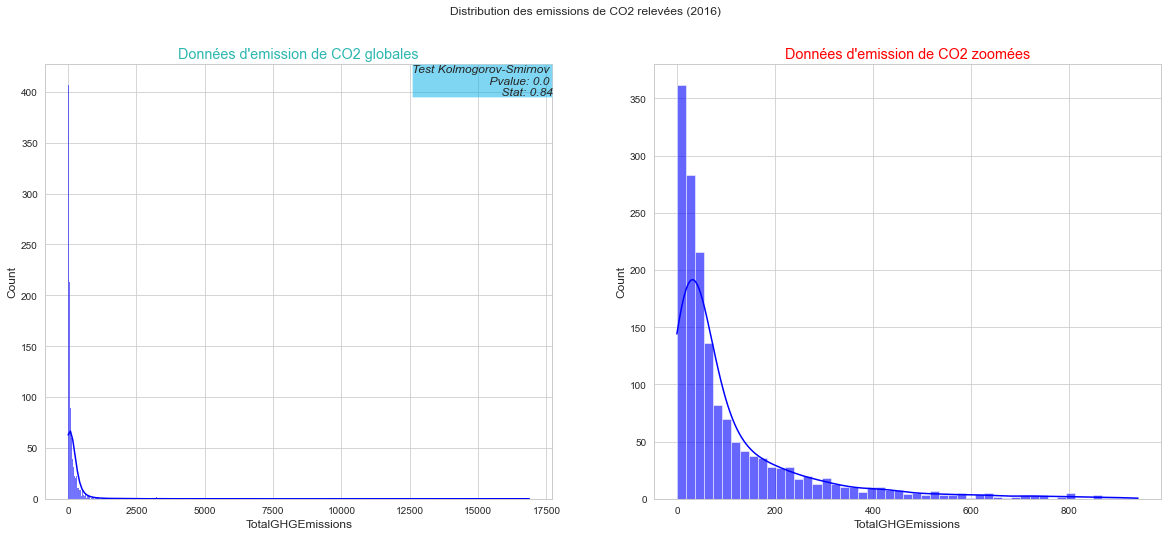

In [149]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=df, x="TotalGHGEmissions", kde=True, ax=axes[0], color="blue", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="blue", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='red')

plt.suptitle("Distribution des emissions de CO2 relevées (2016)")
plt.show()

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\3402262653.py:18: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



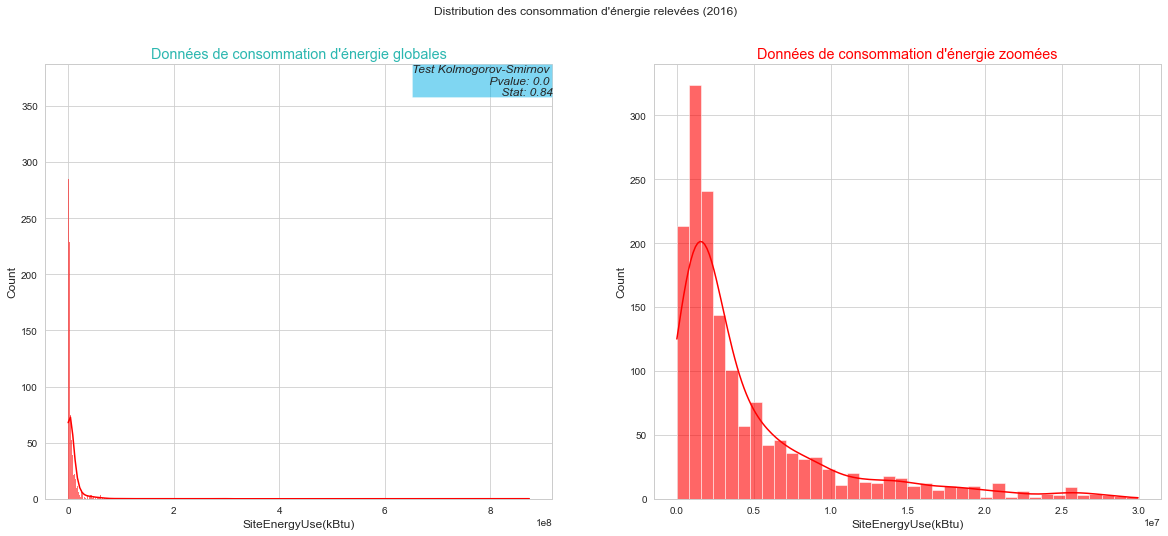

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="red", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="red", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='red')

plt.suptitle("Distribution des consommation d'énergie relevées (2016)")
plt.show()

Remarque: 

- En se basant sur les graphiques obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables.

- Réalisons maintenant les scatterplots des distribition de ces 2 variables :

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\234990095.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



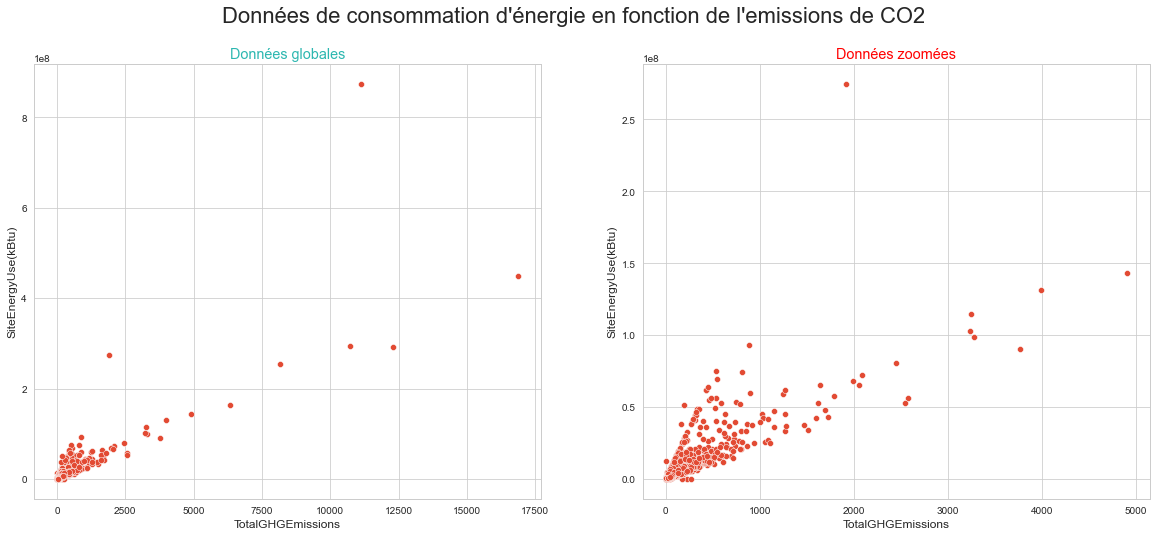

In [151]:
from turtle import title


fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.scatterplot(data=df, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')

sns.scatterplot(data=df[(df['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='red')
plt.suptitle("Données de consommation d'énergie en fonction de l'emissions de CO2", fontsize=22)
plt.show()

Nota Bene : 
- SiteEnergyUse(kBtu): => "La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie."
- TotalGHGEmissions: => "La quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et les gaz d'oxyde nitreux libérés dans l'atmosphère à la suite de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light. Cela utilise le facteur d'émissions 2015 de Seattle City Light de 52,44 lb CO2e/MWh jusqu'à ce que le facteur 2016 soit disponible. Facteur de vapeur Enwave = 170,17 lb CO2e/MMBtu. Facteur de gaz provenant de EPA Portfolio Manager = 53,11 kg CO2e/MBtu."

Remarque : 
- la répartion des données d'emission de CO2 en fonction de la consommation d'énergie ne suivent pas uniquement 1 seule droite de régression linéaire si nous zoomons sur nos données .

C:\Users\mehme\AppData\Local\Temp\ipykernel_1536\3594405164.py:6: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



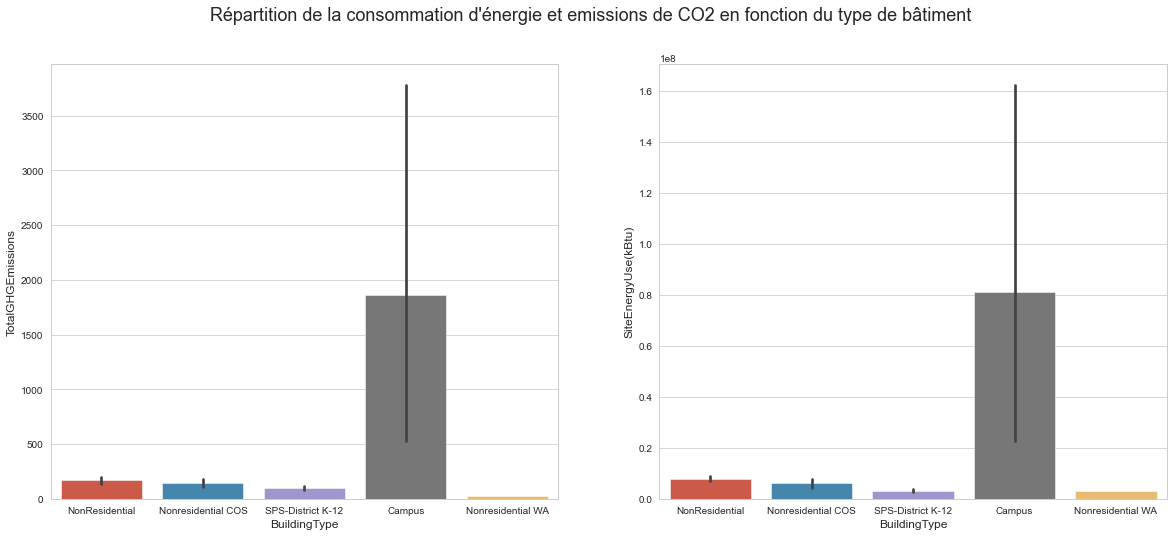

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
              fontsize=18)
plt.show()

Remarque : 

-  les campus sont les constructions qui émettent et consomme le plus en terme d'énergie et de rejets de CO2. 

- A l'inverse des "nonresidential WA". 

#### 3. Dernières étapes de nettoyage

- Nous allons éliminer certaines variables qui ne seront pas utiles pour nos modélisations et vérifier les données incomplètes identifiées dans le jeu de données initial.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1649 non-null   int64  
 1   DataYear                       1649 non-null   int64  
 2   BuildingType                   1649 non-null   object 
 3   PrimaryPropertyType            1649 non-null   object 
 4   PropertyName                   1649 non-null   object 
 5   Address                        1649 non-null   object 
 6   City                           1649 non-null   object 
 7   State                          1649 non-null   object 
 8   ZipCode                        1633 non-null   float64
 9   TaxParcelIdentificationNumber  1649 non-null   object 
 10  CouncilDistrictCode            1649 non-null   int64  
 11  Neighborhood                   1649 non-null   object 
 12  Latitude                       1649 non-null   f

In [154]:
 #le feature "ComplianceStatus" -> représente la conformité des données relevées :
df["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [155]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(df[df['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 101.


In [156]:
df= df[df['ComplianceStatus'] == "Compliant"]

In [157]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'BuildingAge', 'TotalUseTypeNumber', 'GFABuildingRate',
       'GFAParkingRate', 'GFAPerBuilding', 'GFAPerFloor'],
      dtype='object')

suppression des variables:
 - "DefaultData", 
 - "ComplianceStatus", 
 - "TaxParcelIdentificationNumber", 
 - "CouncilDistrictCode", 
 - "City". 

In [158]:
DfFINAL = df.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

##### Cas des longititude et des Latitudes qui peuvent être réunion sous une feature : "Harversine"

N.B : "La formule de haversine permet de déterminer la distance du grand cercle entre deux points d'une sphère, à partir de leurs longitudes et latitudes."

In [159]:
# Cas des longititude et des Latitudes qui peuvent être réunion sous une feature : "Harversine"
#Calcule de cette Indice de Harversine
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [160]:
#Calcul des distance au centre de Seattle pour chaque point
DfFINAL['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(df.Latitude.astype(float), df.Longitude.astype(float))]

In [161]:
DfFINAL01 = DfFINAL.drop(['Latitude','Longitude'], axis=1)


In [162]:
DfFINAL01.shape

(1548, 30)

In [163]:
DfFINAL01.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'State', 'ZipCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge',
       'TotalUseTypeNumber', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance'],
      dtype='object')

In [164]:
# Dernière étape :Phase 1
DfFINAL01.set_index("OSEBuildingID").to_csv("building-energy-cleaned.csv")

Executing shutdown due to inactivity...


2022-10-13 15:35:59,054 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-13 15:36:11,597 - INFO     - Executing shutdown...
d:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\dtale\app.py:422: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Notebook 2(suite) //feature engineering : 'Address', 'State', 'ZipCode, 'YearsENERGYSTARCertified'

Notebook 2: => "SUITE"
Pré-traitement : standardisation / / papeline 
Déterminer : scoring & gridsearch (! dataleak) | X,ytest (20%) & X,ytrain(80%)
- mse
- R2
- mean
Premier simulation : 1 demi-regresseur | Regression lineaire  => lasso | elastic net

## PHASE 2 : Suite notebook 2  (Emissions de CO2 | Consommation d'énergie // ENERGY STAR SCORE)

Sommaire
Preprocessing
-  Encodage et standardisation
-  Préparation des jeux d'entrainement et de test

Modèle Baseline : Régression linéaire multivariée
SVR,...

Modèle non-linéaires : RandomForestRegressor,.. 

Sélection des meilleurs modèles

 - Modèle de prédiction des émissions de CO2
 - Modèle de prédiction des consommations d'énergie
 
Test des modèles sélectionnés
 - Prédiction des émissions de CO2
 - Prédiction des consommation d'énergie
     * CAS : Influence du score ENERGY STAR